# Set up the Environment

In [1]:
# Essential libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
1. Dimensionaly Reduction Algorithms
   - Principal Component Analysis
   - t-SNE

In [2]:
# Scikit-learn for algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [3]:
# Get and prepare teh data
# Available datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
# Load and prepare teh iris dataset for our first example
iris = sns.load_dataset('iris')

In [5]:
# basic exploration 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


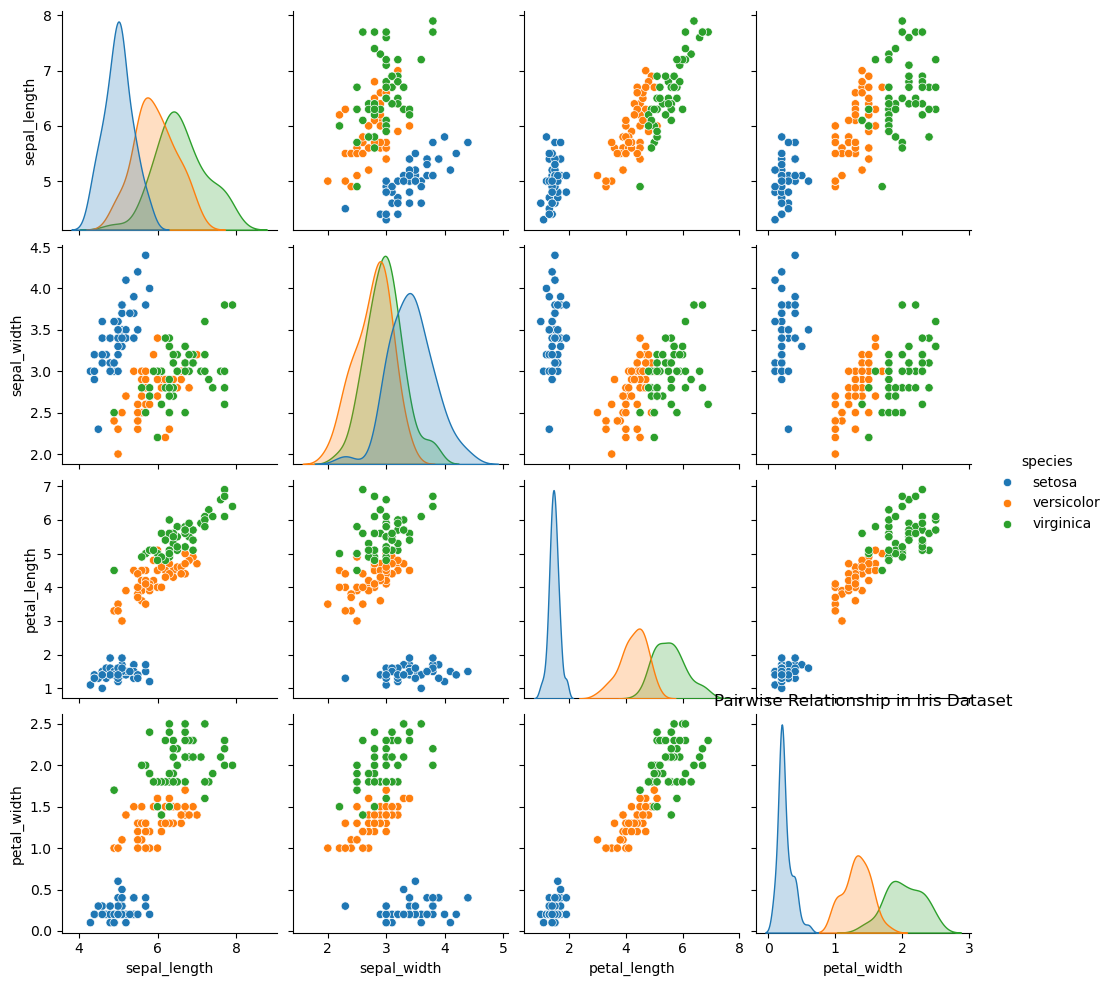

In [8]:
# EDA - Visualize the data
sns.pairplot(iris, hue = 'species')
plt.title("Pairwise Relationship in Iris Dataset")
plt.show()

In [9]:
# Prepare the data for ML modelling
# Extract the features for modelling
X_iris = iris.drop('species', axis = 1).values

In [10]:
# Scaling 
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

In [11]:
X_iris_scaled.shape

(150, 4)

# Dimensionality Reduction
# Pricipal Components Analysis
- Techniques used to reduce the dimensionality of our data while preserving as much variance as possible

In [12]:
# Init the PCA
pca = PCA(n_components = 2)
X_iris_pca = pca.fit_transform(X_iris_scaled)

In [13]:
X_iris_pca.shape

(150, 2)

In [14]:
# Create a dataframe
pca_df = pd.DataFrame(data = X_iris_pca, columns = ['PC1', 'PC2'])
pca_df['species'] = iris['species'].values

In [15]:
pca_df.head()

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


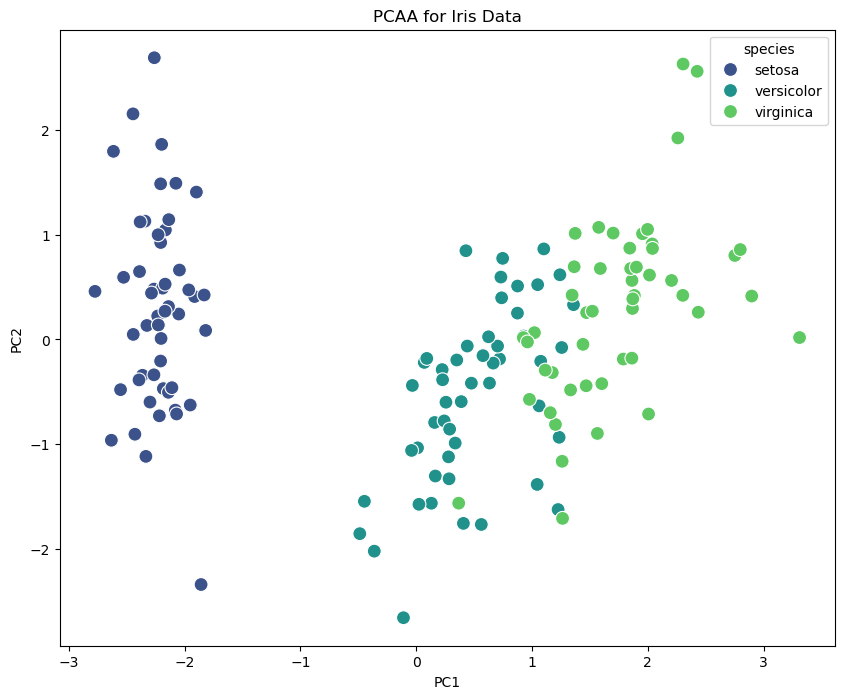

In [16]:
# Plt the results
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'species', data = pca_df, palette = 'viridis', s = 100)
plt.title("PCAA for Iris Data")
plt.show()

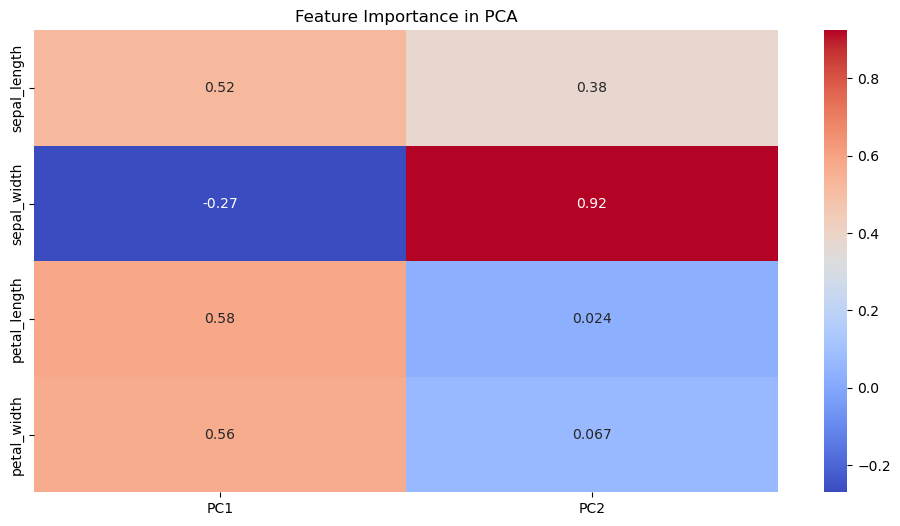

In [17]:
# Feature imporance in the principal componebts

plt.figure(figsize = (12, 6))
components = pd.DataFrame(pca.components_.T,
                          columns = ['PC1', 'PC2'],
                          index = iris.drop('species', axis = 1).columns)
sns.heatmap(components, annot = True, cmap = 'coolwarm')
plt.title("Feature Importance in PCA")
plt.show()

# t-SNE - T-Distributed Stochastic Neighborhood Embedding
- Very Effective for visualization high dimesional data

In [18]:
penguins = sns.load_dataset('penguins').dropna()
X_penguins = penguins.drop(['species', 'island', 'sex'], axis = 1).values
X_penguins_scaled = StandardScaler().fit_transform(X_penguins)

In [19]:
# Apply the tsne
tsne = TSNE(n_components = 2, random_state = 42, perplexity = 50)
X_penguins_tsne = tsne.fit_transform(X_penguins_scaled)

In [20]:
# Create a dataframe
tsne_df = pd.DataFrame(data = X_penguins_tsne, columns = ['t-SNE1', 't-SNE2'])
tsne_df['species'] = penguins['species'].values
tsne_df.head()

,t-SNE1,t-SNE2,species
0,-14.726804,1.726723,Adelie
1,-11.068352,0.976119,Adelie
2,-10.417482,1.170999,Adelie
3,-13.651107,-0.007318,Adelie
4,-15.621012,-2.306440,Adelie


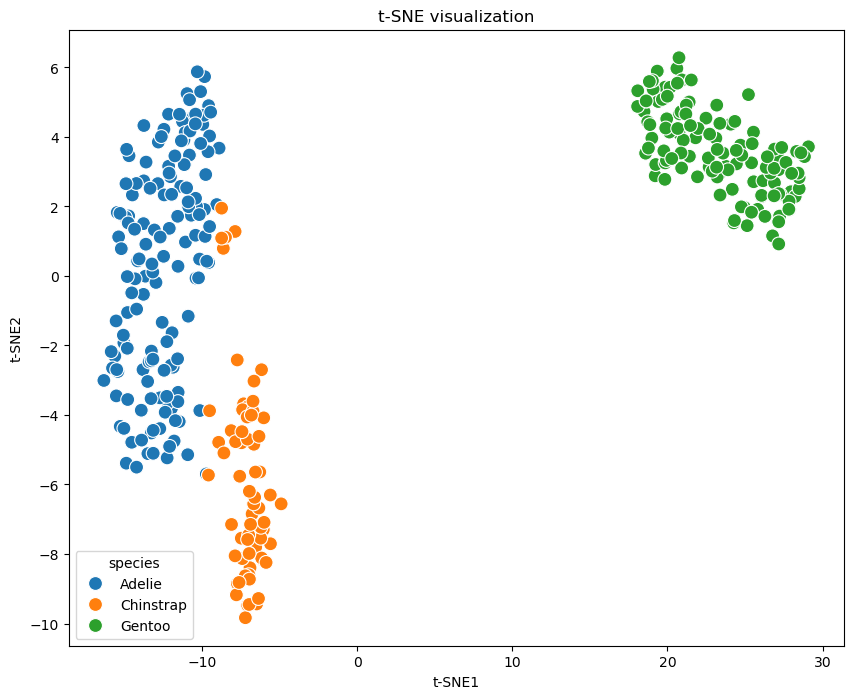

In [21]:
# Plot the t-sne results
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 't-SNE1', y = 't-SNE2', hue = 'species', data = tsne_df, palette = 'tab10', s = 100)
plt.title("t-SNE visualization")
plt.show()

# Clustering Algorithms
## Kmeans Clustering

In [22]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_iris_scaled)
    inertia.append(kmeans.inertia_)

D:\Data\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Data\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Data\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Data\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

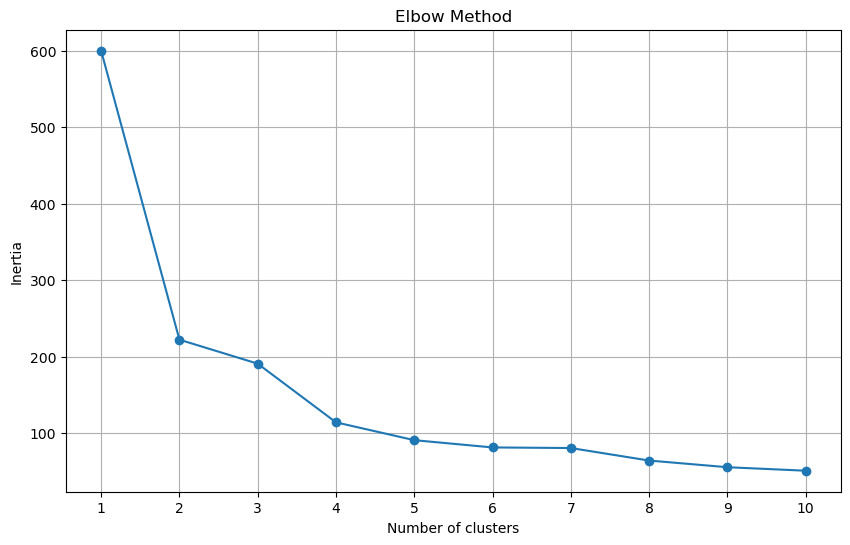

In [23]:
# Plot elbow method
plt.figure(figsize = (10, 6))
plt.plot(k_range, inertia, marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [24]:
# Apply the kmeans
kmeans = KMeans(n_clusters = 3, random_state = 42)
clusters = kmeans.fit_predict(X_iris_scaled)

D:\Data\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
# Add clsuters labels to PCA
pca_df['clusters'] = clusters

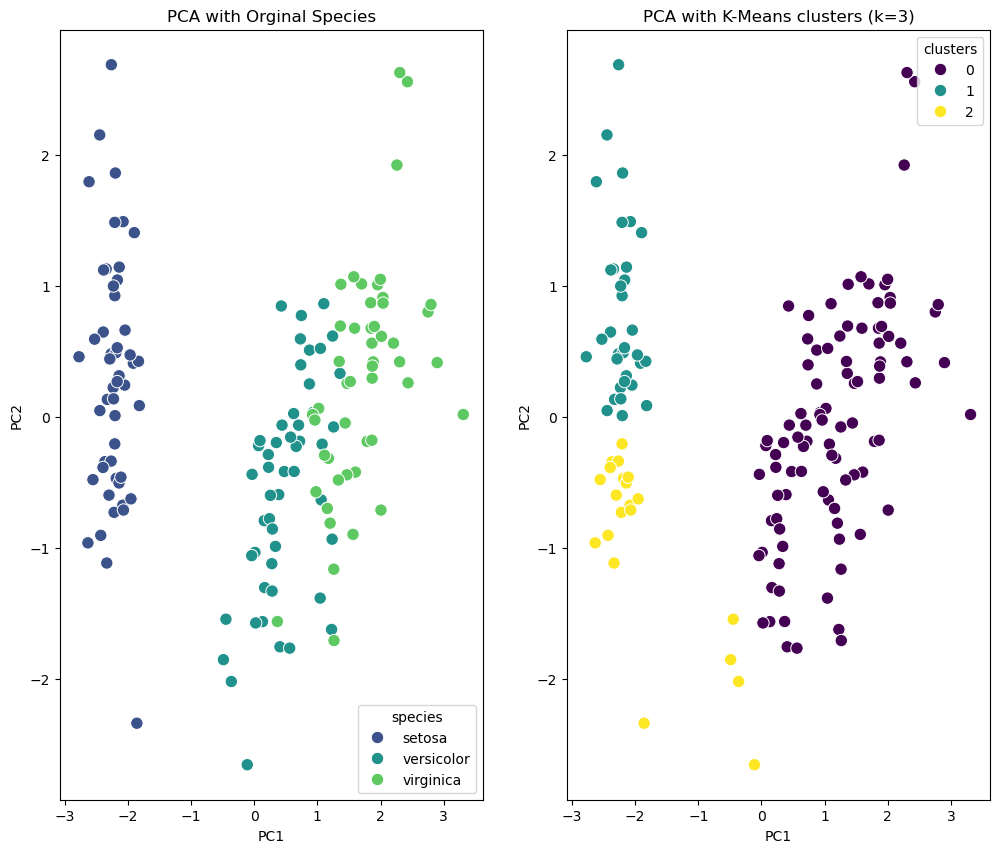

In [26]:
# Visualize with the PCA
plt.figure(figsize = (12, 10))
plt.subplot(1,2,1)
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'species', data = pca_df, palette = 'viridis', s = 80)
plt.title("PCA with Orginal Species")

plt.subplot(1,2,2)
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'clusters', data = pca_df, palette = 'viridis', s = 80)
plt.title("PCA with K-Means clusters (k=3)")
plt.show()

In [27]:
sillhoutte_avg = silhouette_score(X_iris_scaled, clusters)
print(f"Silhoutte Score: {sillhoutte_avg:.3f}")

Silhoutte Score: 0.480


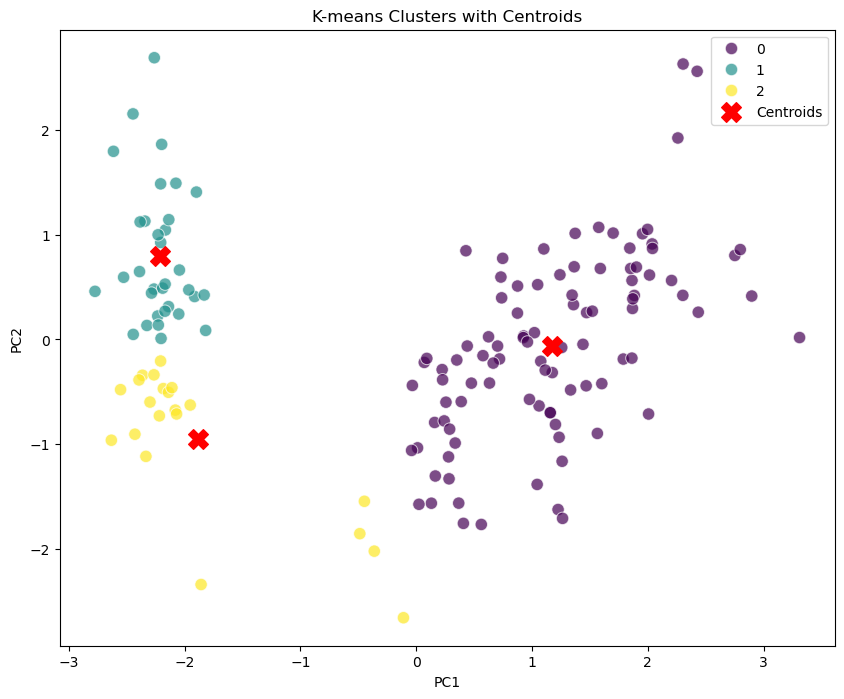

In [28]:
# Visualize the cluster centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize = (10, 8))
sns.scatterplot(x = "PC1", y = 'PC2', hue = 'clusters', data = pca_df, palette = 'viridis', s = 80, alpha = 0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker = 'X', s = 200, color = 'red', label = "Centroids")
plt.title("K-means Clusters with Centroids")
plt.legend()
plt.show()

# Clustering


In [30]:
# Finding the optimal k
from sklearn.datasets import make_blobs

D:\Data\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Data\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Data\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Data\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

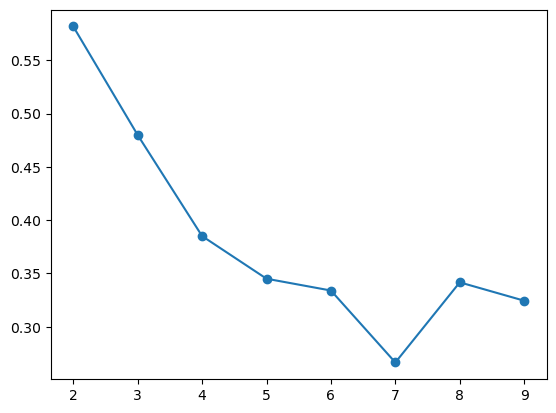

In [35]:
silhuette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(X_iris_scaled)
    silhuette_scores.append(silhouette_score(X_iris_scaled, labels))

plt.plot(k_range, silhuette_scores, marker = 'o')
plt.show()
                    

In [36]:
# Davies Bouldin Method
from sklearn.metrics import davies_bouldin_score

D:\Data\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Data\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Data\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Data\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

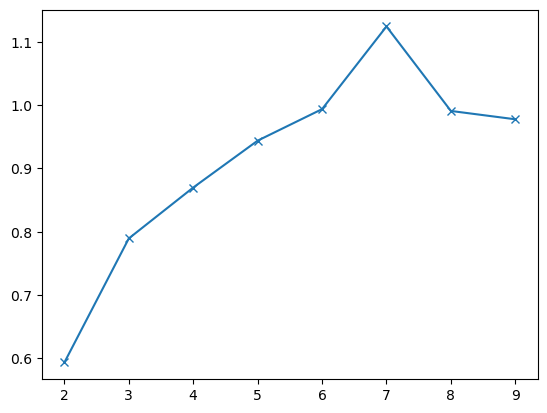

In [39]:
dbi_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(X_iris_scaled)
    labels = kmeans.labels_
    dbi_scores.append(davies_bouldin_score(X_iris_scaled, labels))

plt.plot(range(2, 10), dbi_scores, marker = 'x')
plt.show()

# Hierarchical Clustering


In [41]:
# First compute the linkage
Z = linkage(X_penguins_scaled, method = 'ward') # Other linkages - Single, Complete linkage, Average Linkager
# 

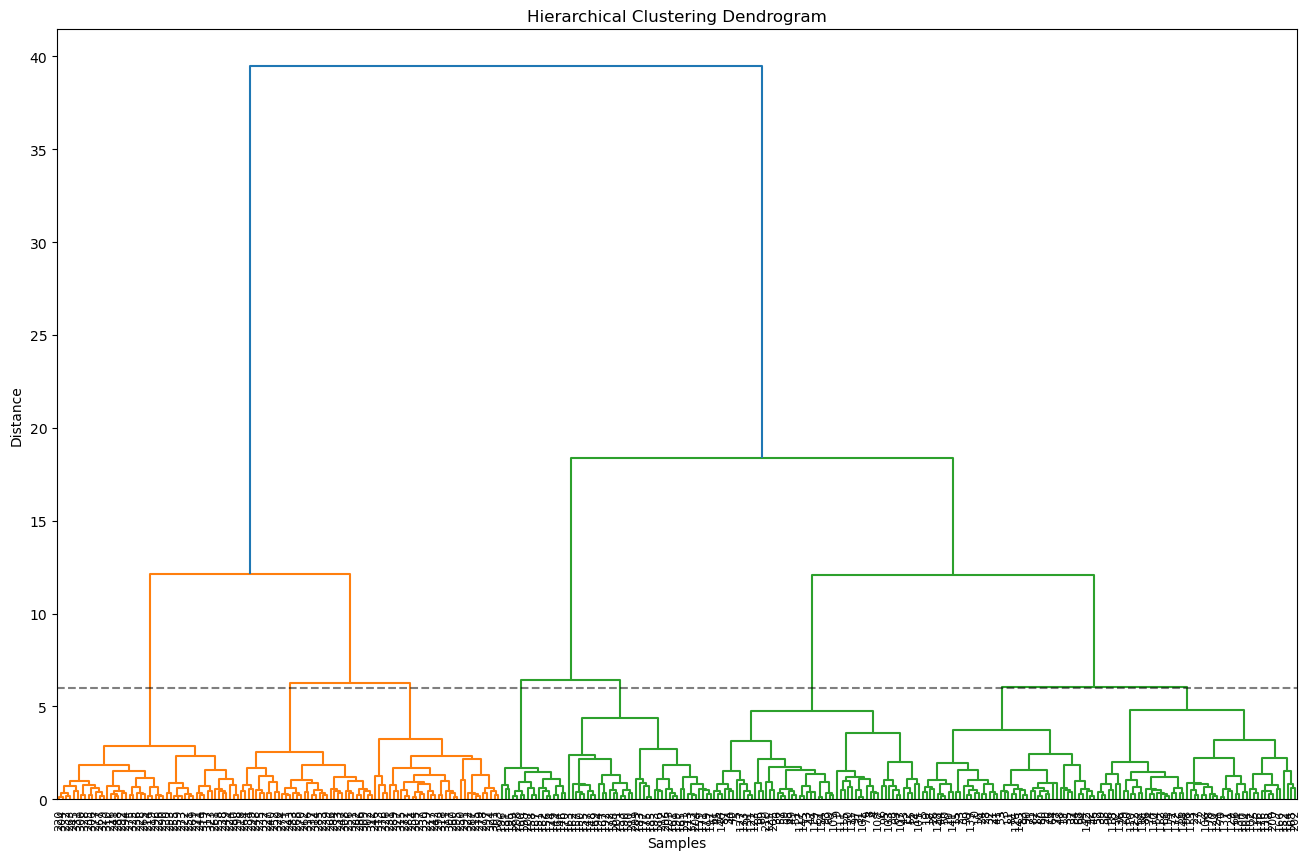

In [42]:
# Plot a dendrogram
plt.figure(figsize = (16, 10))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation = 90., leaf_font_size = 8.)
plt.axhline(y = 6, c = 'k', linestyle = '--', alpha = 0.5)
plt.show()

In [43]:
# Apply Agglomerative Clustering
agg_clusters = AgglomerativeClustering(n_clusters = 3)
agg_clusters = agg_clusters.fit_predict(X_penguins_scaled)

In [46]:
tsne_df['hieerarchical_cluster'] = agg_clusters

In [47]:
tsne_df.head()

,t-SNE1,t-SNE2,species,hieerarchical_cluster
0,-14.726804,1.726723,Adelie,1
1,-11.068352,0.976119,Adelie,1
2,-10.417482,1.170999,Adelie,1
3,-13.651107,-0.007318,Adelie,1
4,-15.621012,-2.306440,Adelie,1


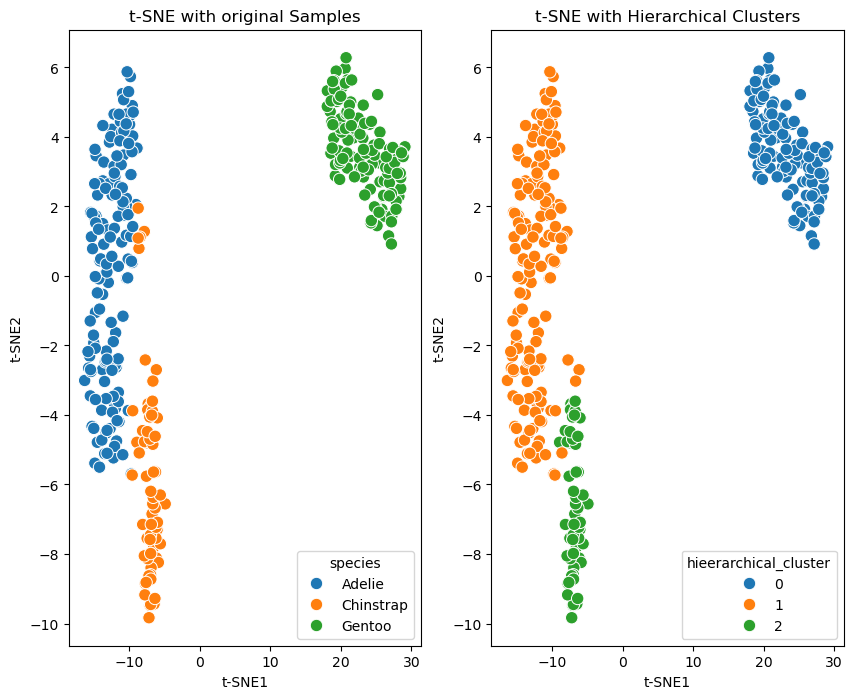

In [48]:
# Visualize the Clusters
plt.figure(figsize = (10, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 't-SNE1', y = 't-SNE2', hue = 'species', data = tsne_df, palette = 'tab10', s = 80)
plt.title('t-SNE with original Samples')

plt.subplot(1, 2, 2)
sns.scatterplot(x = 't-SNE1', y = 't-SNE2', hue = 'hieerarchical_cluster', data = tsne_df, palette = 'tab10', s = 80)
plt.title('t-SNE with Hierarchical Clusters')
plt.show()

In [49]:
# Calculate the silhouette score 
silhouette_avg = silhouette_score(X_penguins_scaled, agg_clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.45209829496381126


In [ ]:
# Evaluations
- Silhouette Score
- Davies-Bouldin Index - Lower = Better
- Calinski-Harabasz Index (CHI) = Higher Better 